# Integrantes: 
- Matías Cuevas Torres
- Pablo Reyes Polanco

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import nbinom
import seaborn as sns

%matplotlib inline

# 1. Carga de datos, inspección y filtro

In [ ]:
try:
    junaeb = pd.read_csv("../data/junaeb.csv")
except:
    junaeb = pd.read_csv("https://raw.githubusercontent.com/juancaros/LAB-MAA/main/data/junaeb.csv")

Los datos se cargan directamente desde github por lo que para correr el codigo es necesario contar con conexion a internet

In [ ]:
junaeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vive_padre          6607 non-null   int64  
 1   vive_madre          6607 non-null   int64  
 2   n_personas          6472 non-null   float64
 3   n_habitaciones      6457 non-null   float64
 4   cercania_juegos     6475 non-null   float64
 5   cercania_servicios  6475 non-null   float64
 6   edad_primer_parto   6386 non-null   float64
 7   area                6607 non-null   int64  
 8   educm               6607 non-null   int64  
 9   educp               6607 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 516.3 KB


Para determinar los datos nulos de la base de datos se utiliza el comando .info describiendo la cantidad de no nullos y el tipo de dato que es para cada variable (entero y float).

In [ ]:
junaeb.describe()

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
count,6607.000000,6607.000000,6472.000000,6457.000000,6475.000000,6475.000000,6386.000000,6607.000000,6607.000000,6607.000000
mean,0.669593,0.949902,4.387361,2.583862,1.205405,1.154286,22.220169,0.900863,12.314364,10.917209
std,0.470395,0.221607,1.344752,0.900471,0.459817,0.421625,5.193370,0.298869,4.329315,5.481642
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,4.000000,2.000000,1.000000,1.000000,18.000000,1.000000,11.000000,9.000000
50%,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,21.000000,1.000000,13.000000,13.000000
75%,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,25.000000,1.000000,15.000000,13.000000
max,1.000000,2.000000,16.000000,20.000000,4.000000,4.000000,48.000000,1.000000,20.000000,20.000000


Luego se realizó el calculo de estadisticas descriptibas para cada una de las variables considerando el tamaño de la muestra (count), promedio (mean),  desviacion estandar (STD), el valor minimo (min), maximo (max), y los intervalos de confianza en 25%, 50% y 75%.

vive_padre
1    4424
0    2183
dtype: int64

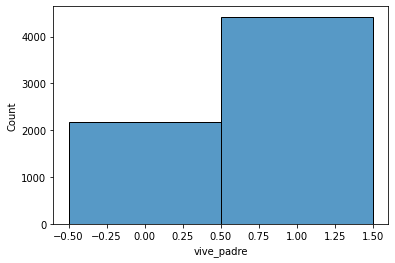

In [ ]:
sns.histplot(junaeb, x = "vive_padre", discrete=True)
junaeb.value_counts("vive_padre")

Vive_padre es una variable dummy que no tiene outliers, solo valores de 0 y 1 

vive_madre
1    6266
0     336
2       5
dtype: int64

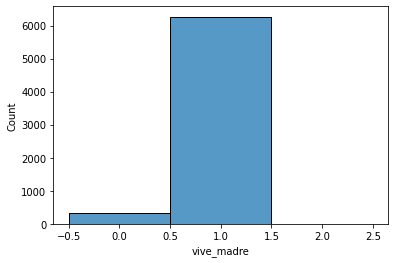

In [ ]:
var = "vive_madre"
sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)

en la variable vive_madre existen 5 datos  con valor 2, lo que no tiene sentido ya que esa variable solo puede valer 0 o 1 por lo que se eliminan esos datos

vive_madre
1    6266
0     336
dtype: int64

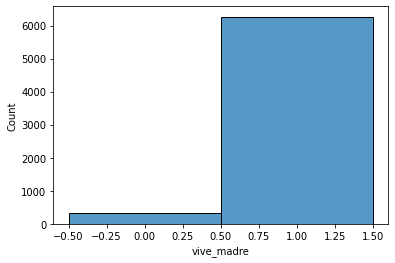

In [ ]:
junaeb = junaeb[junaeb.vive_madre < 2]
var = "vive_madre"
sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)

Asi queda la varaible vive_madre luego de la eliminación de dichos datos

n_personas
4.0     2418
5.0     1466
3.0     1249
6.0      641
2.0      265
7.0      244
8.0      112
9.0       45
10.0       8
1.0        7
11.0       6
12.0       3
14.0       1
15.0       1
16.0       1
dtype: int64

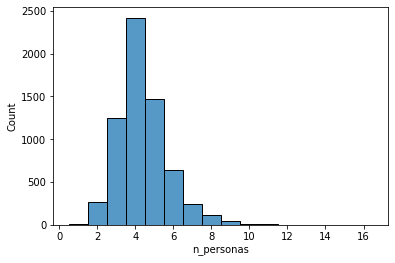

In [ ]:
var = "n_personas"
sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)

para la variable n_personas que indica la cantidad de personas que componen los integrantes del hogar, existe datos con muy poca frecuencia por lo que se decidió quedarse con los datos que estuvieran dentro de un intervalo de confianza de 3 sigmas 

0.3532342555546739 4.386578011442709 8.419921767330745


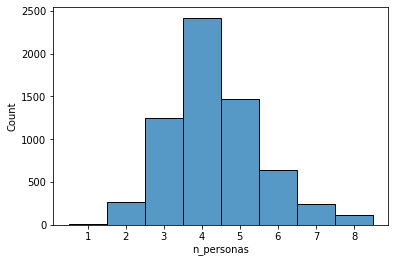

In [ ]:
var = "n_personas"

media = junaeb[var].mean()
std = junaeb[var].std()
mask = (junaeb[var] > media - 3*std) & (junaeb[var] < media + 3*std)
junaeb = junaeb[mask]

sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)

print(media-3*std, media, media+3*std)

las posibles valores que estan dentro del intervalo de confianza son: 1,2,3,4,5,6,7,8 

n_habitaciones
2.0     2885
3.0     2341
4.0      618
1.0      398
5.0      119
6.0       19
7.0        2
0.0        1
8.0        1
9.0        1
10.0       1
20.0       1
dtype: int64

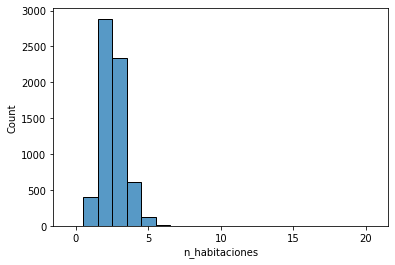

In [ ]:
var = "n_habitaciones"
sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)

Para la variable n_habitaciones, se encuentra que puede tener outliers por lo que se eliminan aquellas filas que estén a más de 3 desviaciones estandar

n_habitaciones
2.0    2885
3.0    2341
4.0     618
1.0     398
5.0     119
0.0       1
dtype: int64

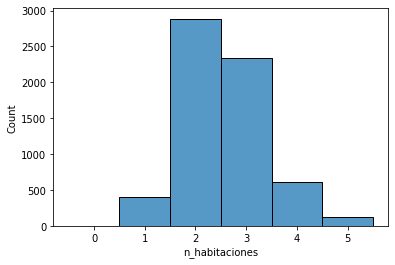

In [ ]:


var = "n_habitaciones"

media = junaeb[var].mean()
std = junaeb[var].std()
mask = (junaeb[var] > media - 3*std) & (junaeb[var] < media + 3*std)
junaeb = junaeb[mask]

sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)

finalmente los posibles valores que puede tomar n_habitaciones son: 0,1,2,3,4,5

Cercanía_juegos tiene un código numérico para quienes respondieron no sabe/
no responde (toma valor 4 la variable), una primera aproximación será eliminar dichos valores

cercania_juegos
1.0    5163
2.0    1156
4.0      43
dtype: int64

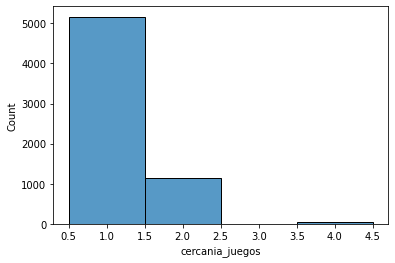

In [ ]:
var = "cercania_juegos"
sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)

Se decide eliminar las respuestas no sabe/no responde de la muestra

cercania_juegos
1.0    5163
2.0    1156
dtype: int64

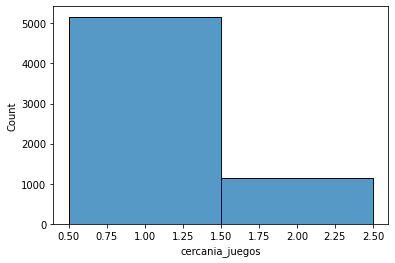

In [ ]:

var = "cercania_juegos"

mask = (junaeb[var] < 3)
junaeb = junaeb[mask]

sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)

cercania_juegos queda como una variable binaria con 1 y 2 como posibles valores, como no tiene outliers, no se realiza ninguna modificacion en la variable

cercania_servicios
1.0    5463
2.0     833
4.0      23
dtype: int64

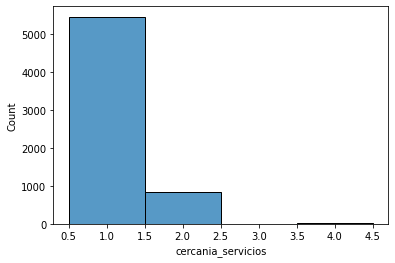

In [ ]:
var = "cercania_servicios"
sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)

Cercanía_servicios tiene un código numérico para quienes respondieron no sabe/ no responde (toma valor 4 la variable), una primera aproximación será eliminar dichos valores

cercania_servicios
1.0    5463
2.0     833
dtype: int64

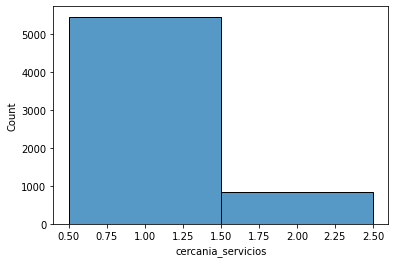

In [ ]:

var = "cercania_servicios"

mask = (junaeb[var] < 3)
junaeb = junaeb[mask]

sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)


Se decide eliminar las respuestas no sabe/no responde de la muestra

Se decide eliminar la variable edad_primer_parto, ya que aquellos valores que 
son nulos podrían ser originados por casos en que no se sepa sobre el paradero 
de la madre, o adopciones, por lo que se cree podría sesgar los datos.


In [ ]:

junaeb = junaeb.drop("edad_primer_parto", axis = 1).dropna() # si se elimina la columna respecto al primer parto y luego los na

area
1    5669
0     627
dtype: int64

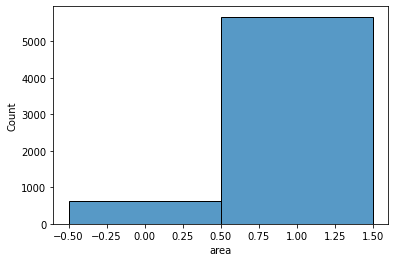

In [ ]:
var = "area"
sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)

la variable area es una variable binaria sin outlier por lo que no se modifica

educm
13    2578
9      498
16     436
18     419
15     405
11     363
17     342
0      249
12     165
10     160
14     158
20      98
7       97
8       92
6       79
5       63
19      47
3       20
4       19
2        8
dtype: int64

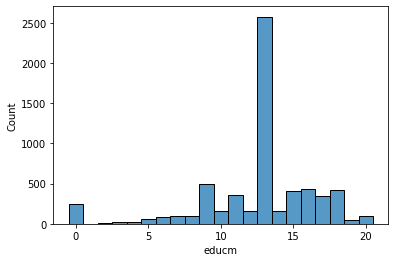

In [ ]:
var = "educm"
sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)

educp
13    2436
0      865
9      519
11     359
15     303
17     303
18     290
16     262
10     188
12     180
20     123
14      92
8       79
7       73
19      67
5       56
6       49
3       25
4       21
2        6
dtype: int64

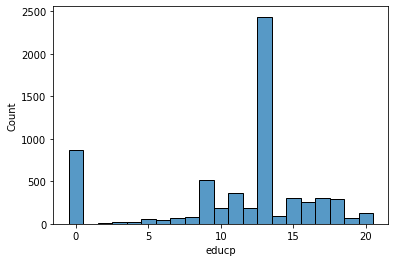

In [ ]:
var = "educp"
sns.histplot(junaeb, x = var, discrete=True)
junaeb.value_counts(var)

In [ ]:
junaeb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6296 entries, 0 to 6474
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vive_padre          6296 non-null   int64  
 1   vive_madre          6296 non-null   int64  
 2   n_personas          6296 non-null   float64
 3   n_habitaciones      6296 non-null   float64
 4   cercania_juegos     6296 non-null   float64
 5   cercania_servicios  6296 non-null   float64
 6   area                6296 non-null   int64  
 7   educm               6296 non-null   int64  
 8   educp               6296 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 620.9 KB


finalmente las variables a utilizar en el modelo seran vive_ padre como variabla dependiente y las variables independientes seran vive_madre, n_personas, _n_habitaciones, cercania_juegos, cercania_servicios, area, educm y educp

Ademas luego de la limpieza la cantidad de datos no nulos se corresponde con la cantidad de entradas en la base de datos

# 2. Modelo Lineal: Mínimos Cuadrados Ordinarios (MCO)

In [ ]:
y=junaeb['vive_padre']
X=junaeb.drop('vive_padre', axis = 1)
X=sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             vive_padre   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     158.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.94e-243
Time:                        03:56:59   Log-Likelihood:                -3530.9
No. Observations:                6296   AIC:                             7080.
Df Residuals:                    6287   BIC:                             7141.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2656      0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Corriendo el OLS por primera vez, se puede apreciar que segun la prueba t de significancia individual las variables cerncani?juegos y cercania_servicios, segun su valor p, no se puede asegurar que sean distintas de 0


Por otro lado las variables que influyen positivamente la variable dependiente Y son: vive_madre, n_personas, Cercania_servicios, Educp

mientras que las que la afectan negativamente son n_habitaciones, cercania_uegos, area y educm



In [ ]:
y = junaeb['vive_padre']
X = junaeb.drop(['vive_padre', "cercania_juegos","cercania_servicios"], axis = 1)
X = sm.add_constant(X)
model = sm.OLS(y, X)
OLS_model = model.fit()
print(OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:             vive_padre   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     210.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          9.47e-246
Time:                        03:56:59   Log-Likelihood:                -3531.0
No. Observations:                6296   AIC:                             7076.
Df Residuals:                    6289   BIC:                             7123.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2684      0.042      6.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
comp = junaeb['vive_padre'].to_frame()
comp["estimado"] = OLS_model.predict(X).to_frame()
comp["binario_estimado"] = pd.cut(comp["estimado"], bins = [-1000, 0.5, 1000], labels = [0,1])

prop_correctas = len(comp[comp["binario_estimado"] == comp["vive_padre"]]) / len(comp)
print(f"porentaje de clasificaciones correcttas {prop_correctas * 100 :.2f}%")

porentaje de clasificaciones correcttas 77.00%


# 3. Modelo Probit

In [ ]:
y = junaeb['vive_padre']
X = junaeb.drop(['vive_padre'], axis = 1)
X = sm.add_constant(X)
model = sm.Probit(y, X)
probit_model = model.fit()
print(probit_model.summary())

mfx = probit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.541123
         Iterations 5


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                          Probit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6296
Model:                         Probit   Df Residuals:                     6287
Method:                           MLE   Df Model:                            8
Date:                Wed, 14 Sep 2022   Pseudo R-squ.:                  0.1318
Time:                        03:56:59   Log-Likelihood:                -3406.9
converged:                       True   LL-Null:                       -3924.0
Covariance Type:            nonrobust   LLR p-value:                5.968e-218
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6627      0.162     -4.101      0.000      -0.979      -0.346
vive_madre             0.3871      0.102      3.809      0.000       0.188       0.586
n_personas          

In [ ]:
y = junaeb['vive_padre']
X = junaeb.drop(['vive_padre', "cercania_juegos","cercania_servicios"], axis = 1)
X = sm.add_constant(X)
model = sm.Probit(y, X)
probit_model = model.fit()
print(probit_model.summary())

mfx = probit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.541124
         Iterations 5


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                          Probit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6296
Model:                         Probit   Df Residuals:                     6289
Method:                           MLE   Df Model:                            6
Date:                Wed, 14 Sep 2022   Pseudo R-squ.:                  0.1318
Time:                        03:57:00   Log-Likelihood:                -3406.9
converged:                       True   LL-Null:                       -3924.0
Covariance Type:            nonrobust   LLR p-value:                3.481e-220
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6640      0.134     -4.944      0.000      -0.927      -0.401
vive_madre         0.3873      0.102      3.811      0.000       0.188       0.586
n_personas         0.1790      0.016

In [ ]:
comp = junaeb['vive_padre'].to_frame()
comp["estimado"] = probit_model.predict(X).to_frame()
comp["binario_estimado"] = pd.cut(comp["estimado"], bins = [-1000, 0.5, 1000], labels = [0,1])

prop_correctas = len(comp[comp["binario_estimado"] == comp["vive_padre"]]) / len(comp)
print(f"porentaje de clasificaciones correcttas {prop_correctas * 100 :.2f}%")

porentaje de clasificaciones correcttas 77.02%


# 4. Modelo Logit

In [ ]:
y = junaeb['vive_padre']
X = junaeb.drop(['vive_padre'], axis = 1)
X = sm.add_constant(X)

model = sm.Logit(y, X)
logit_model = model.fit()
print(logit_model.summary())

mfx = logit_model.get_margeff()
print(mfx.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.539055
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6296
Model:                          Logit   Df Residuals:                     6287
Method:                           MLE   Df Model:                            8
Date:                Wed, 14 Sep 2022   Pseudo R-squ.:                  0.1351
Time:                        03:57:00   Log-Likelihood:                -3393.9
converged:                       True   LL-Null:                       -3924.0
Covariance Type:            nonrobust   LLR p-value:                1.425e-223
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1446      0.275     -4.168      0.000      -1.683      -0.606
vive_

In [ ]:
y = junaeb['vive_padre']
X = junaeb.drop(['vive_padre', "cercania_juegos","cercania_servicios"], axis = 1)
X = sm.add_constant(X)

model = sm.Logit(y, X)
logit_model = model.fit()
print(logit_model.summary())

mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.539058
         Iterations 6

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)



                           Logit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6296
Model:                          Logit   Df Residuals:                     6289
Method:                           MLE   Df Model:                            6
Date:                Wed, 14 Sep 2022   Pseudo R-squ.:                  0.1351
Time:                        03:57:00   Log-Likelihood:                -3393.9
converged:                       True   LL-Null:                       -3924.0
Covariance Type:            nonrobust   LLR p-value:                8.194e-226
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1564      0.228     -5.065      0.000      -1.604      -0.709
vive_madre         0.6925      0.169      4.101      0.000       0.361       1.023
n_personas         0.3167      0.02

In [ ]:
comp = junaeb['vive_padre'].to_frame()
comp["estimado"] = logit_model.predict(X).to_frame()
comp["binario_estimado"] = pd.cut(comp["estimado"], bins = [-1000, 0.5, 1000], labels = [0,1])

prop_correctas = len(comp[comp["binario_estimado"] == comp["vive_padre"]]) / len(comp)
print(f"porentaje de clasificaciones correcttas {prop_correctas * 100 :.2f}%")

porentaje de clasificaciones correcttas 77.13%


# 5. Comentarios

2. Corriendo el OLS por primera vez, se puede apreciar que segun la prueba t de significancia individual las variables cerncania_juegos y cercania_servicios, segun su valor p, no se puede asegurar que sean distintas de 0, por lo que se decidieron sacar del modelo.
al correrlo por segunda vez sin las variables antes mencionadas resultó con que todas son significativas y  que aquellas variables que influyen positivamente la variable dependiente  son: 

vive_madre: indica que en vive_padre cambia en 0.1359 cuando aumenta en una unidad vive madre

n_personas:  indica que en vive_padre cambia en 0.0583 cuando aumenta en una unidad n_personas

Educp: indica que en vive_padre cambia en 0.0348 cuando aumenta en una unidad educp

mientras que las que la afectan negativamente son:
n_habitaciones:  indica que en vive_padre cambia en 0.1359 cuando aumenta en una unidad vive madre

cercania_juegos:  indica que en vive_padre cambia en 0.1359 cuando aumenta en una unidad vive madre

area:  indica que en vive_padre cambia en 0.1359 cuando aumenta en una unidad vive madre

educm:  indica que en vive_padre cambia en 0.1359 cuando aumenta en una unidad vive madre


Sin embargo al tener la regresión lineal cuyo resultado no esta restringido entre 0 y 1, podría no ser el modelo mas adecuado para este tipo de estimación y los metodo no lineales podrían resultar mejor.

Respecto a como interpretar los parámetros de la regresión, dado que ninguno está en un logaritmo, simplemente indica que ante un cambio de una unidad en la variable explicativa la variable explicada cambia en la medida que indica el parametro, con todo el resto constante.

Al correr los modelos de probit y logit  los valores obtenidos de log-likelihood, para el probit (-3406.9) son menores a los de logit (-3393.9), y  debido que a mayor log-likelihood implica un mejor ajuste al modelo, el logit funciona mejor para este caso. Cabe destacar que tanto el modelo Probit como el modelo Logit tienen una mejor especificación que el modelo estimado con OLS, dado que tienen un likelihood mayor a este (-3531.0).
Ademas mencionar que para realizar este test los modelos deben tener la misma cantidad de variables independientes (se cumple)


En sintesis para este caso el modelo logit es el que funciona mejor ya que esta mejor especificado según lo descrito en la prueba de log-likelihood. (no existe mucha diferencia con el probit).

En el caso de la estimación probit y logit, los parámetros no pueden ser interpretados en forma tan simple en comparación al OLS, por lo que se calculan los efectos marginales, estos indican en que medida aumenta la probabilidad de que la variable explicada sea 1, ante un cambio en la variable explicativa correspondiente, con el resto constante.





# 6. Poisson

In [ ]:
y=junaeb['n_personas']
X = junaeb.drop(['n_personas'], axis = 1)

poisson=sm.GLM(y,X,family=sm.families.Poisson()).fit()
print(poisson.summary())

print("fitted lambda")
print(poisson.mu)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6296
Model:                            GLM   Df Residuals:                     6288
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11345.
Date:                Wed, 14 Sep 2022   Deviance:                       1881.7
Time:                        03:57:00   Pearson chi2:                 2.01e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
vive_padre             0.1114      0

In [ ]:
y=junaeb['n_personas']
X = junaeb.drop(['n_personas',"educm", "educp"], axis = 1)

poisson=sm.GLM(y,X,family=sm.families.Poisson()).fit()
print(poisson.summary())

print("fitted lambda")
print(poisson.mu)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6296
Model:                            GLM   Df Residuals:                     6290
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11345.
Date:                Wed, 14 Sep 2022   Deviance:                       1882.1
Time:                        03:57:00   Pearson chi2:                 2.01e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
vive_padre             0.1121      0

# 7. Dispersión

### no tiene sentido decir que hay sobredispersion ni utilizar un alpha < 0 como valor para la binomial negativa

In [ ]:
aux=((y-poisson.mu)**2-poisson.mu)/poisson.mu
auxr = sm.OLS(aux,poisson.mu).fit()
print(auxr.params)

x1   -0.156321
dtype: float64


#### Como el alpha estimado  es menor a 1 no se utiliza para el modelo binomial negativo, además este es indicio de que no hay sobredispersión en ls datos

# 8. Biomial Negativa

In [ ]:
negbin=sm.GLM(y,X,family=sm.families.NegativeBinomial()).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6296
Model:                            GLM   Df Residuals:                     6290
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16178.
Date:                Wed, 14 Sep 2022   Deviance:                       362.53
Time:                        03:57:00   Pearson chi2:                     398.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
vive_padre             0.1216      0

In [ ]:
y=junaeb['n_personas']
X = junaeb.drop(['n_personas',"educm", "educp"], axis= 1)

negbin=sm.GLM(y,X,family=sm.families.NegativeBinomial()).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6296
Model:                            GLM   Df Residuals:                     6290
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16178.
Date:                Wed, 14 Sep 2022   Deviance:                       362.53
Time:                        03:57:00   Pearson chi2:                     398.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
vive_padre             0.1216      0

# 9. Comentarios

Para explicar el numero de personas que viven en un hogar utilizando poisson, resulto que las variables correspondiente a la educación de los padres (educm, edup) resultaron ser no significativas por lo que fueron quitadas del modelo.

Luego al realizar nuevamente el modelo, resultó que las variables que si fueron significativa dentro del modelo (se puede aseguras que son distintas de 0) son: vive_padre, vive_madre, n_habitaciones, cercania_juego, cercania_servicios y el area, las cuales afectan positivamanete a la variable dependiente, lo que indica que un aumento en una de estas variables creará un aumento en la vaariable dependiente n_personas.

Una caracteristica de la distribución de poisson es que varianza = media = lambda, por lo que si la dispersión de los datos es distinta a la media, se recomienda utilizar otro tipo de modelo como la regresión binomial negativa, la cual es útil cuando se encuentra una sobredispersión en los datos. Para esto se estimó alpha como la medida de la dispersión de los datos. 

Dado que este es menor a 1, no se encuentra sobredispersión en los datos, es más, como este es un valor negativo tampoco se puede utilizar como valor inicial para el modelo de regresión bonimoail negativo ya que este requiere que tenga valor positivo, por lo que se concluye que es mejor quedarse con el modelo Poisson.

Por las razones ateriormente expuestas se espera que el modelo Poisson responda de mejor forma la pregunta de investigación, al habe poca dispersión se debería ajustar relativamente bien, mientras que el modelo binomial negativo al estar diseñado para cuando hay sobredisersión no logra ajustarse tan bien a los datos, además se encuentra que el parametro de log-likelihood del modelo Poisson es mucho más cercano a cero.

Finalmente las variables robustas para el modelo son:

- vive_padre
- vive_madre       
- n_habitaciones   
- cercania_juegos  
- cercania_servicios
- area    
